## Objetivo do Projeto


O cliente do projeto é o Banco Global Trust, sua preocupação é com fraudes em transações de cartão de crédito. O objetivo é detectar essas fraudes para minimizar os prejuízos e garantir a segurança dos clientes.

A base de dados é composta por variáveis numéricas, que passaram por uma transformação PCA. Foram processadas 284.807 transações de cartões de crédito, sendo que, 492 foram identificadas como fraude.
Conforme o demandante: as fraudes são raras, mas potencialmente devastadoras.

A variável target (Class) é binária e indica: 1(fraude) e 0(não fraude).

Demanda do cliente: desenvolver um modelo preditivo capaz de identificar as fraudes de maneira eficaz. Deve-se construir um modelo que não apenas maximize a acurácia, mas também minimize os falsos negativos.

## Análise Inicial dos Dados

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
# Carregamento da Base
df = pd.read_csv('Base_M43_Pratique_CREDIT_CARD_FRAUD.csv')

In [3]:
# Visualização Inicial da Base
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Verificação dos Dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Não há valores nulos e os tipos de dados estão corretos.

In [5]:
# Verificação da Distribuição da Variável Target Class
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Observa-se uma base muito desbalanceada, com apenas 0,17% dos dados correspondentes à classe 1, de fraude.

In [6]:
# Matriz de Correlação
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Como são muitas features a visualização da matriz de correlação ficou confusa e difícil de interpretar, portanto, faremos um gráfico de barras mostrando apenas a correlação de cada feature com a variável target.

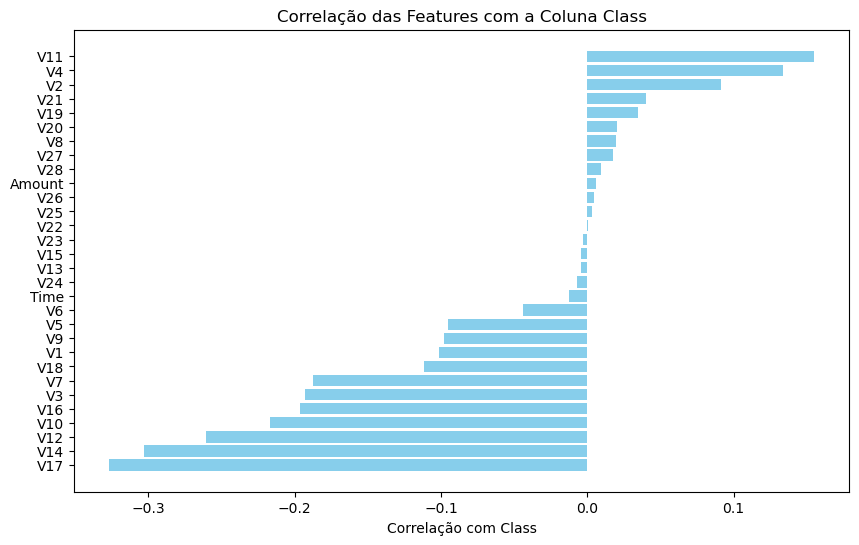

In [29]:
# Gráfico da Correlação das Features com a Coluna Class
cor_class = df.corr()['Class'].drop('Class').sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.barh(cor_class.index, cor_class.values, color='skyblue')
plt.xlabel('Correlação com Class')
plt.title('Correlação das Features com a Coluna Class')
plt.gca().invert_yaxis()
plt.show()

As principais variáveis correlacionadas à Class são, respectivamente: V17, V14, V12, V10, V16, V3, V7, V18 e V11.

Com a grande quantidade de features, poderia ser interessante utilizar o PCA para diminuir a dimensionalidade da base, contudo, no vídeo de apresentação, é informado que essa etapa já foi realizada: as variáveis disponibilizadas não são as variáveis originais, mas sim compenentes principais resultantes da aplicação do PCA. Portanto, não faria sentido aplicar novamente a técnica.

Por mais que tenhamos variáveis pouco correlacionadas à target, removê-las poderia causar a perda de informações importantes. Nesse caso, utilizaremos todas as variáveis na modelagem.

## Preparação dos Dados

In [8]:
# Separação da Base em X(features) e Y(variável target)
X = df.drop(columns=['Class'])
Y = df['Class']

In [9]:
# Separação da Base em Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [10]:
# Balanceamento
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

## Modelagem

A ideia é testar vários modelos com e sem balanceamento. O modelo que tiver a melhor perfomance será escolhido para uma ampla pesquisa de hiperparâmetros.

Serão testados modelos lineares (Regressão Logística), baseados em árvores (Random Forest e XGBoost) e baseados em margens e hiperplanos (SVM).

## Regressão Logística

#### Regressão Logística sem Balanceamento

In [11]:
# Modelagem
lr = LogisticRegression(max_iter=300000, random_state=42)

In [12]:
# Treinamento
lr.fit(x_train, y_train)

LogisticRegression(max_iter=300000, random_state=42)

In [13]:
# Previsão
y_pred_lr = lr.predict(x_test)

In [14]:
# Resultados
print('Relatório Regressão Logística sem Balanceamento:\n', classification_report(y_test, y_pred_lr))
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print('Matriz de Confusão Regressão Logística sem Balanceamento:\n', conf_matrix)

Relatório Regressão Logística sem Balanceamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusão Regressão Logística sem Balanceamento:
 [[56855     9]
 [   42    56]]


O modelo apresentou desempenho excelente para a classe 0 (não fraude), com métricas iguais a 1,00.
Já para a classe 1 (fraude), apesar da alta precisão (0,86), o recall foi baixo (0,57), indicando que muitas transações fraudulentas não foram detectadas.
A matriz de confusão indica que o modelo identificou corretamente 56 das 98 fraudes, mas deixou de detectar 42 casos.
Como o objetivo é maximizar a identificação de fraudes, o desempenho atual não é satisfatório.

#### Regressão Logística com Balanceamento

In [15]:
# Modelagem
lr_balanced = LogisticRegression(max_iter=300000, random_state=42)

In [16]:
# Treinamento
lr_balanced.fit(x_train_balanced, y_train_balanced)

LogisticRegression(max_iter=300000, random_state=42)

In [17]:
# Previsão
y_pred_lr_balanced = lr_balanced.predict(x_test)

In [18]:
# Resultados
print('Relatório Regressão Logística com Balanceamento:\n', classification_report(y_test, y_pred_lr_balanced))
conf_matrix = confusion_matrix(y_test, y_pred_lr_balanced)
print('Matriz de Confusão Regressão Logística com Balanceamento:\n', conf_matrix)

Relatório Regressão Logística com Balanceamento:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.92      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.96      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Matriz de Confusão Regressão Logística com Balanceamento:
 [[56394   470]
 [    8    90]]


Com o balanceamento, o recall da classe 1 subiu para 0,92, mas a precisão caiu para 0,16, gerando muitos falsos positivos e comprometendo a confiabilidade do modelo.
A matriz de confusão mostra que, apesar de detectar 90 das 98 fraudes (alto recall), o modelo classificou 470 transações legítimas como fraude, refletindo a baixa precisão obtida.

Conclusão: a regressão logística apresentou dois resultados extremos:
1- Sem balanceamento: Apesar da ótima acurácia do modelo, o recall da classe 1, métrica mais importante para este projeto, ficou abaixo do esperado, deixando passar muitos casos fraudulentos.
2- Ao balancear os dados o recall da classe 1 aumentou para 0.92, contudo, a precisão ficou muito baixa. Ou seja, por mais que o modelo tenha aprendido a identificar os casos fraudulentos, o modelo acusa de fraude muitos casos em que não são.

## Random Forest

#### Random Forest sem Balanceamento

In [19]:
# Modelagem
rf = RandomForestClassifier(random_state=42)

In [20]:
# Treinamento
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Previsão
y_pred_rf = rf.predict(x_test)

In [22]:
# Resultados
print('Relatório Random Forest sem Balanceamento:\n', classification_report(y_test, y_pred_rf))
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusão Random Forest sem Balanceamento:\n', conf_matrix)

Relatório Random Forest sem Balanceamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusão Random Forest sem Balanceamento:
 [[56862     2]
 [   23    75]]


O modelo Random Forest sem balanceamento teve um desempenho muito superior à regressão logística sem balanceamento.

O Random Forest obteve a mesma acurácia ótima, mas também obteve um recall muito superior, conseguindo prever corretamente 77% dos casos fraudulentos.

#### Random Forest com Balanceamento

In [23]:
# Modelagem
rf_balanced = RandomForestClassifier(random_state=42)

In [24]:
# Treinamento
rf_balanced.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [26]:
# Previsão
y_pred_rf_balanced = rf_balanced.predict(x_test)

In [27]:
# Resultados
print('Relatório Random Forest com Balanceamento:\n', classification_report(y_test, y_pred_rf_balanced))
conf_matrix = confusion_matrix(y_test, y_pred_rf_balanced)
print('Matriz de Confusão Random Forest com Balanceamento:\n', conf_matrix)

Relatório Random Forest com Balanceamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusão Random Forest com Balanceamento:
 [[56852    12]
 [   15    83]]


Conclusão: o modelo Random Forest com balanceamento obteve um desempenho superior ao modelo sem balanceamento.

Ao balancear os dados obteve-se novamente um f1-score excelente para a classe 0. 

Já para a classe 1 obteve-se um recall de 0.85 e precisão de 0.87. 

Comparando com a regressão logística obtemos um modelo mais equilibrado em precisão e recall para a classe 1. O recall ainda está inferior ao modelo de regressão logística com balanceamento, porém sem acusar tantos falsos positivos.



## XGBoost

#### XGBoost sem Balanceamento

In [28]:
# Modelagem
xgb = XGBClassifier(random_state=42)

In [29]:
# Treinamento
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
# Previsão
y_pred_xgb = xgb.predict(x_test)

In [33]:
# Resultados
print('Relatório XGBoost sem Balanceamento:\n', classification_report(y_test, y_pred_xgb))
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print('Matriz de Confusão XGBoost sem Balanceamento:\n', conf_matrix)

Relatório XGBoost sem Balanceamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusão XGBoost sem Balanceamento:
 [[56859     5]
 [   19    79]]


O modelo XGBoost sem balanceamento obteve um recall superior ao modelo Random Forest sem balanceamento, porém, obteve precisão inferior.

#### XGBoost com Balanceamento

In [34]:
# Modelagem
xgb_balanced = XGBClassifier(random_state=42)

In [35]:
# Treinamento
xgb_balanced.fit(x_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
# Previsão
y_pred_xgb_balanced = xgb_balanced.predict(x_test)

In [38]:
# Resultados
print('Relatório XGBoost com Balanceamento:\n', classification_report(y_test, y_pred_xgb_balanced))
conf_matrix = confusion_matrix(y_test, y_pred_xgb_balanced)
print('Matriz de Confusão XGBoost com Balanceamento:\n', conf_matrix)

Relatório XGBoost com Balanceamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.86      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusão XGBoost com Balanceamento:
 [[56843    21]
 [   14    84]]


Com o balanceamento o recall da classe 1 aumentou de 0.81 para 0.86, levemente superior ao encontrado no Random Forest - 0.85. Contudo, a precisão diminuiu de 0.94 para 0.80, fazendo com que o f1-score, 0.83, fique inferior ao modelo Random Forest, 0.86.

Conclusão sobre os modelos baseados em árvore: o balanceamento é essencial para aumentar o recall da classe 1. Pode-se observar que os modelos de árvores resultam em resultados mais equilibrados, comparando com o modelo de regressão logística.
A diferença entre o Random Forest e o XGBoost é pequena: o XGBoost obteve um recall superior, porém uma precisão inferior.

## SVM

No SVM a ideia é testar os três principais kernels (linear, poly e rbf), para ver qual performará melhor na base de dados.

#### SVM Linear sem  Balanceamento

In [68]:
# Modelagem
svm_lin = SVC(kernel = 'linear', random_state=42)
# Treinamento
svm_lin.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [69]:
# Previsão
y_pred_svm_lin = svm_lin.predict(x_test)

In [71]:
# Resultados
print('Relatório:\n', classification_report(y_test, y_pred_svm_lin))
conf_matrix = confusion_matrix(y_test, y_pred_svm_lin)
print('Matriz de Confusão:\n', conf_matrix)

Relatório:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.60      0.30      0.40        98

    accuracy                           1.00     56962
   macro avg       0.80      0.65      0.70     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusão:
 [[56845    19]
 [   69    29]]


No SVM linear sem balanceamento o recall da classe 0 foi de apenas 0.3, ou seja, a cada 10 casos fraudulentos o modelo somente identificará 3. Um resultado incosistente para o objetivo do projeto.

#### SVM Linear com Balanceamento

In [22]:
# Modelagem
svm_lin_balanced = SVC(kernel = 'linear' , random_state=42)

In [ ]:
# Treinamento
svm_lin_balanced.fit(x_train_balanced, y_train_balanced)

Inicialmente a ideia era analisar a performance do modelo SVM utilizando os três kernels tanto na base sem balanceamento, quanto na base balanceada.

Contudo, o SVM sem balanceamento demorou cerca de 20 minutos para ser treinado e em mais de uma hora o código de treinamento com a base balanceada ainda não rodou. Levando em conta que essa base engloba apenas dois dias, torna-se inviável utilizar o modelo SVM. Portanto, o modelo será desconsiderado.

## Escolha do Modelo a Ser Otimizado

Tendo em vista que a principal demanda é identificar corretamente as fraudes, temos como métrica principal de avaliação o recall da classe 1.
Tanto na regressão logística quanto nos modelos baseados em árvores os melhores resultados foram encontrados quando utilizou-se a base balanceada.
Abaixo seguem os relatórios de cada modelo com a base balanceada.

In [39]:
print('Relatório Regressão Logística com Balanceamento:\n', classification_report(y_test, y_pred_lr_balanced))
conf_matrix = confusion_matrix(y_test, y_pred_lr_balanced)
print('Matriz de Confusão Regressão Logística com Balanceamento:\n', conf_matrix)

Relatório Regressão Logística com Balanceamento:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.92      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.96      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Matriz de Confusão Regressão Logística com Balanceamento:
 [[56394   470]
 [    8    90]]


In [40]:
print('Relatório Random Forest com Balanceamento:\n', classification_report(y_test, y_pred_rf_balanced))
conf_matrix = confusion_matrix(y_test, y_pred_rf_balanced)
print('Matriz de Confusão Random Forest com Balanceamento:\n', conf_matrix)

Relatório Random Forest com Balanceamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusão Random Forest com Balanceamento:
 [[56852    12]
 [   15    83]]


In [41]:
print('Relatório XGBoost com Balanceamento:\n', classification_report(y_test, y_pred_xgb_balanced))
conf_matrix = confusion_matrix(y_test, y_pred_xgb_balanced)
print('Matriz de Confusão XGBoost com Balanceamento:\n', conf_matrix)

Relatório XGBoost com Balanceamento:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.86      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Confusão XGBoost com Balanceamento:
 [[56843    21]
 [   14    84]]


Observa-se que o modelo com o maior recall para classe 1 é a regressão logística (0.92), no entanto, a precisão é extremamente baixa (0.16), isso demonstra que o modelo acusa muitos falsos positivos, comprometendo a confiabilidade do modelo.

A diferença entre os modelos Random Forest e XGBoost é pequena: O XGBoost possui um recall levemente superior (0.86 contra 0.85) e uma precisão menor (0.80 contra 0.87).

Por se tratar de uma base com muitas variáveis a otimização é uma questão importante. O modelo Random Forest levou cerca de 600 segundos para rodar, já o modelo XGBoost levou cerca de 5 segundos. 

Por ser um modelo com recall superior para a classe 1, em comparação com o Random Forest, e por ser mais eficiente em termos de otimização e velocidade de processamento em bases maiores, o XGBoost se mostrou a melhor escolha para esta base.

A seguir iremos definir os melhores hiperparâmetros, de modo a ter o melhor recall possível.

## Definição dos Hiperparâmetros para o XGBoost

In [47]:
# Dicionário com os Principais Hiperparâmetros
best_params = {
'n_estimators': [50, 100, 200],
'max_depth': [3, 5, 7],
'learning_rate': [0.01, 0.1, 0.3],
'min_child_weight': [1, 3, 5],
'gamma': [0, 0.1, 0.3],
'subsample': [0.8, 1.0],
'colsample_bytree': [0.8, 1.0],
'reg_alpha': [0, 0.1, 1],
'reg_lambda': [1, 1.5, 2]
}

In [48]:
# Grid Search
grid_search = GridSearchCV(estimator=xgb_balanced, param_grid=best_params,
scoring='recall', cv=3, verbose=1, n_jobs=-1)

In [49]:
# Treinamento do Grid Search
grid_search.fit(x_train_balanced, y_train_balanced)

Fitting 3 folds for each of 8748 candidates, totalling 26244 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=1)

In [53]:
# Resultados
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 1.0}


## XGBoost com os Melhores Parâmetros

In [12]:
# Modelagem
xgb_best_params = XGBClassifier(
    random_state=42,
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    n_estimators=200,
    reg_alpha=0.1,
    reg_lambda=1.5,
    subsample=1.0
)

In [13]:
# Treinamento
xgb_best_params.fit(x_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
# Previsão
y_pred_xgb_best_params = xgb_best_params.predict(x_test)

In [16]:
# Resultados
print('Relatório XGBoost com os Melhores Parâmetros:\n', classification_report(y_test, y_pred_xgb_best_params))
conf_matrix = confusion_matrix(y_test, y_pred_xgb_best_params)
print('Matriz de Correlação XGBoost com os Melhores Parâmetros:\n', conf_matrix)

Relatório XGBoost com os Melhores Parâmetros:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.87      0.76        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Matriz de Correlação XGBoost com os Melhores Parâmetros:
 [[56822    42]
 [   13    85]]


Ao aplicar os hiperparâmetros foi possível aumentar o recall da classe 1 de 0.86 para 0.87, contudo a precisão diminuiu de 0.80 para 0.67. 

Nesse caso, esse foi o segundo melhor modelo em termos de recall, perdendo apenas para a regressão logística. Porém, a regressão logística obteve uma péssima precisão, prevendo muitos falsos positivos, o que poderia comprometer a qualidade do modelo e a experiência do cliente.

O modelo XGBoost com os melhores parâmetros, por mais que tenha diminuído sua precisão comparado ao modelo sem a escolha dos hiperparâmetros, conseguiu manter um bom equilíbrio entre recall e precisão. Dessa forma, atende ao objetivo principal de identificar a maior quantidade possível de fraudes, sem gerar um número excessivo de falsos positivos, mostrando-se uma alternativa sólida e confiável para aplicação prática.